## ARIMA Model - (Auto Regressive Integrated Moving Average)

Arima analysis for Amazon stock price.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARMA

In [11]:
# Read in data (data is monthly prices) 

amzn = pd.read_csv('AMZN.csv')
print('Shape of dataset:', amzn.shape)
amzn.head()

Shape of dataset: (262, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-02-08,3358.500000,3365.000000,3233.310059,3277.709961,3277.709961,13237600
258,2021-02-15,3254.050049,3338.000000,3245.750000,3249.899902,3249.899902,13204800
259,2021-02-22,3208.129883,3232.320068,3036.699951,3092.929932,3092.929932,20011500
260,2021-03-01,3127.889893,3163.520020,2881.000000,3000.459961,3000.459961,20128400
261,2021-03-08,3015.000000,3116.459961,2951.310059,3057.639893,3057.639893,11210700


From the shape output, we can see that we have 5 columns (excluding the 'Date' as this is the index) and 262 rows.

### Data cleaning

In [6]:
# We just want the 'Close' prices from the dataset

amznData = amzn.dropna()                                    # remove any NA's
amznData.index = pd.to_datetime(amznData.Date)              # set 'Date' as the index
amznData = amznData['Close']['2016-03-07': '2021-03-08']    # Date range
amznData.head()

Date
2016-03-07    569.609985
2016-03-14    552.080017
2016-03-21    582.950012
2016-03-28    598.500000
2016-04-04    594.599976
Name: Close, dtype: float64

In [7]:
# Obtain the main statistics of the dataset
amznData.describe()

count     262.000000
mean     1652.834654
std       780.957105
min       552.080017
25%       961.349976
50%      1654.170044
75%      1906.289978
max      3401.800049
Name: Close, dtype: float64

Text(0.5, 1.0, 'AMZN Stock Price')

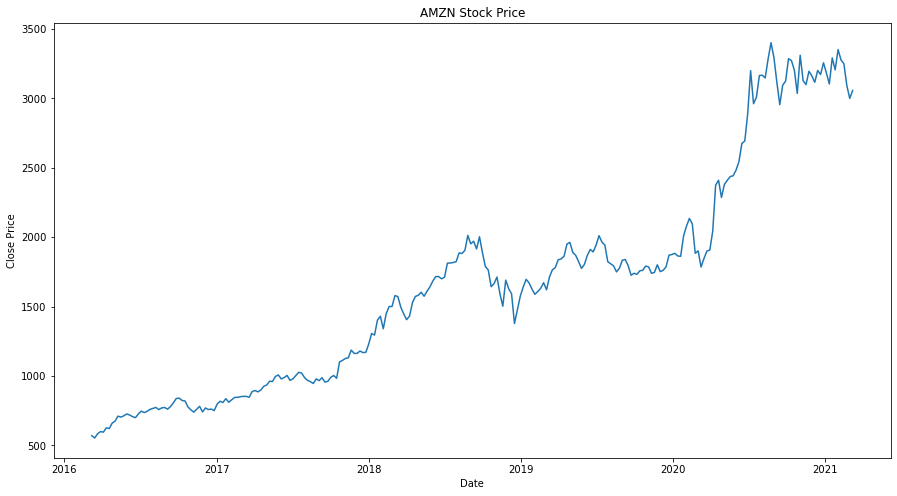

In [10]:
# Data exploration

plt.figure(figsize=(15,8))
fig = plt.figure(1)

ax1 = fig.add_subplot(111)      # 1 by 1 grid
ax1.plot(amznData)
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.set_title('AMZN Stock Price')

### Check for stationarity

In [6]:
# Find the rolling statistics

rolmean = amznData.rolling(12).mean()    # Mean
rolstd = amznData.rolling(12).std()      # Standard deviation

print(rolmean, rolstd)

Date
2016-03-07            NaN
2016-03-14            NaN
2016-03-21            NaN
2016-03-28            NaN
2016-04-04            NaN
                 ...     
2021-02-08    3210.070801
2021-02-15    3214.617452
2021-02-22    3208.813273
2021-03-01    3199.149943
2021-03-08    3187.149109
Name: Close, Length: 262, dtype: float64 Date
2016-03-07           NaN
2016-03-14           NaN
2016-03-21           NaN
2016-03-28           NaN
2016-04-04           NaN
                 ...    
2021-02-08     72.851477
2021-02-15     73.547767
2021-02-22     80.451971
2021-03-01     97.678381
2021-03-08    105.848233
Name: Close, Length: 262, dtype: float64


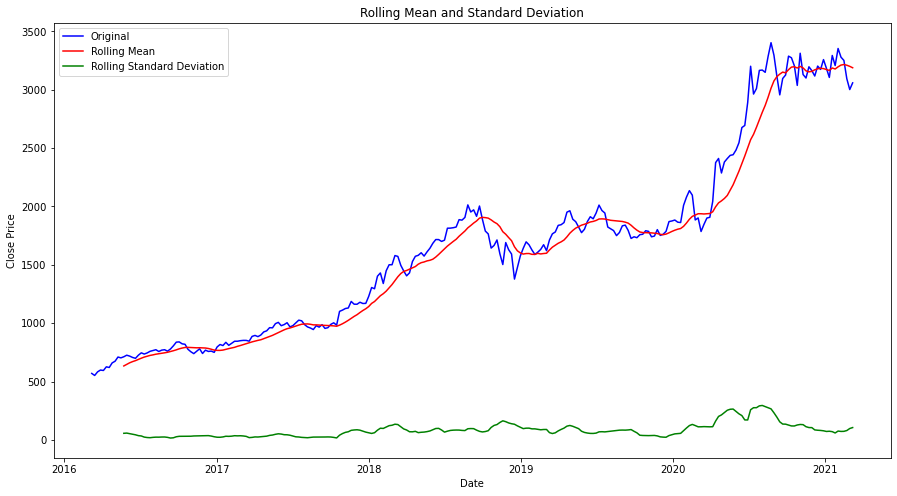

In [7]:
# Plot rolling statistics

plt.figure(figsize=(15,8))
fig = plt.figure(1)

orig = plt.plot(amznData, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')

We can see from the plot, that the rolling standard deviaton is roughly constant over time. 

Text(0, 0.5, 'Log Close Price')

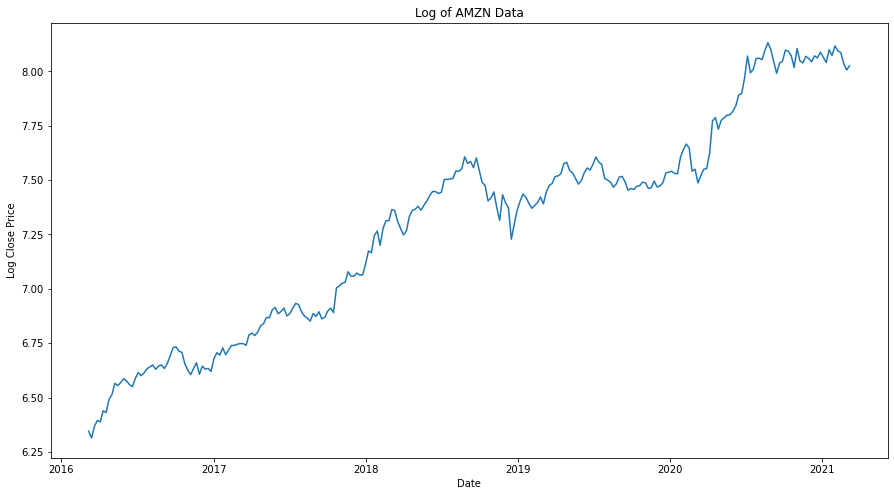

In [17]:
# Make the series stationary, by taking the log of the data

plt.figure(figsize=(15,8))
fig = plt.figure(1)

amzn_log = np.log(amznData)             # log of AMZN data
plt.plot(amzn_log)
plt.title('Log of AMZN Data')
plt.xlabel('Date')
plt.ylabel('Log Close Price')

From looking at the above plot, the time series does not really become stationary.

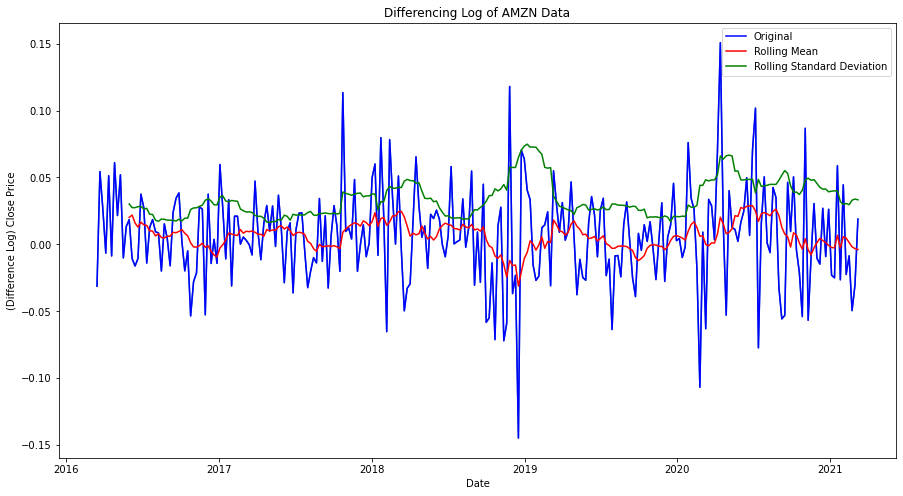

In [19]:
# Create differences of the time series: shift the time series by 1, then subtract this from the original.
# We will use 'Lag 1' differencing (Yt - Yt-1)

plt.figure(figsize=(15,8))
fig = plt.figure(1)

amzn_log_diff = amzn_log - ts_log.shift()
plt.plot(amzn_log_diff)
plt.title('Differencing Log of AMZN Data')
plt.xlabel('Date')
plt.ylabel('(Difference Log) Close Price')


# Find the rolling statistics
rolmean = amzn_log_diff.rolling(12).mean()    # Mean
rolstd = amzn_log_diff.rolling(12).std()      # Standard deviation

# Plot rolling statistics:
orig = plt.plot(amzn_log_diff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
plt.legend(loc='best')

We can assume that the time series is now constant. If we were to take the mean between the 'Rolling mean' and the 'Rolling standard devation', then there shouldn't be much of a difference.

In [20]:
# Autocorrelation (ACF) and Partial Autocorrelation (PACF)
# These are statistical correlations that summarise strength of relation ship between two variables.

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(amzn_log_diff, nlags=20)       # plotting acf for 'difference to time series'
lag_pacf = pacf(amzn_log_diff, nlags=20)     # plotting pacf for 'difference to time series'

# nlags: number of lags to return autocorrelation for

C:\Users\leftf\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


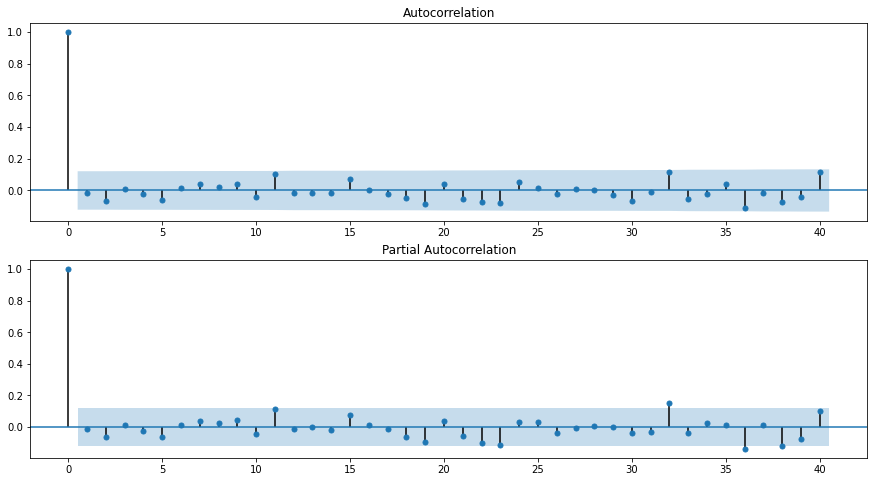

In [21]:
# Plot acf and pacf

import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))

#acf:
ax1 = fig.add_subplot(211)      # 2 rows by 1 column, plot 1
fig = sm.graphics.tsa.plot_acf(amzn_log_diff.dropna(), lags=40, ax=ax1)      

# pacf:
ax2 = fig.add_subplot(212)      # 2 rows by 1 column, plot 2
fig = sm.graphics.tsa.plot_pacf(amzn_log_diff.dropna(), lags=40, ax=ax2)     

### AR and MA models:

AR (Long memory models): forecast a series based just on past values in the series (lags). 

MA (Short memory models): forecast a series just on the past errors in the series (error lags).

C:\Users\leftf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
C:\Users\leftf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


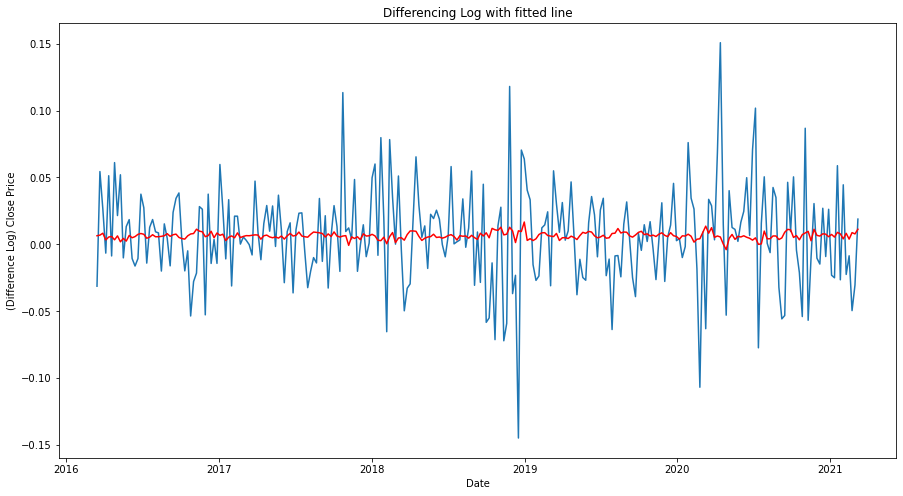

In [25]:
# Arima model:

from statsmodels.tsa.arima_model import ARIMA
fig = plt.figure(figsize=(15,8))
plt.title('Differencing Log with fitted line')
plt.xlabel('Date')
plt.ylabel('(Difference Log) Close Price')


amzn_model = ARIMA(amzn_log, order=(2,1,2))                # Arima settings: AR=2, I=1, MA=2
amzn_results_ARIMA = amzn_model.fit(disp=-1)               # fitted data, based on the Arima model
plt.plot(amzn_log_diff)                                    # 'difference to time series' plot
plt.plot(amzn_results_ARIMA.fittedvalues, color='red')     # fitted line plot

The plot above shows how the fitted values (red line), compares against the actual values (blue line). 

### Transforming the results back to original scale

In [28]:
# Taking the fitted values
ARIMA_diff_predictions = pd.Series(amzn_results_ARIMA.fittedvalues, copy=True)      
print(ARIMA_diff_predictions)

Date
2016-03-14    0.006450
2016-03-21    0.006904
2016-03-28    0.008331
2016-04-04    0.003305
2016-04-11    0.005481
                ...   
2021-02-08    0.008236
2021-02-15    0.003927
2021-02-22    0.008774
2021-03-01    0.007818
2021-03-08    0.011302
Length: 261, dtype: float64


In [29]:
# cumulative sum, as we have differenced with the time series
ARIMA_diff__predictions_cumsum = ARIMA_diff_predictions.cumsum()         
print(ARIMA_diff__predictions_cumsum)

Date
2016-03-14    0.006450
2016-03-21    0.013354
2016-03-28    0.021685
2016-04-04    0.024990
2016-04-11    0.030471
                ...   
2021-02-08    1.647182
2021-02-15    1.651109
2021-02-22    1.659883
2021-03-01    1.667701
2021-03-08    1.679003
Length: 261, dtype: float64


In [15]:
# taking log prediction and adding 'cumulative sum' to compensate for the differencing
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index = ts_log.index)     
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff__predictions_cumsum,fill_value=0)
print(ARIMA_log_prediction)

Date
2016-03-07    6.344952
2016-03-14    6.351402
2016-03-21    6.358306
2016-03-28    6.366637
2016-04-04    6.369942
                ...   
2021-02-08    7.992134
2021-02-15    7.996061
2021-02-22    8.004835
2021-03-01    8.012653
2021-03-08    8.023955
Length: 262, dtype: float64


In [30]:
# Make predictions:
results_ARIMA.predict(250,262)     # return predictions for points 250 to 262

2020-12-21    0.007635
2020-12-28    0.005720
2021-01-04    0.007423
2021-01-11    0.005452
2021-01-18    0.008975
2021-01-25    0.007801
2021-02-01    0.004103
2021-02-08    0.008236
2021-02-15    0.003927
2021-02-22    0.008774
2021-03-01    0.007818
2021-03-08    0.011302
2021-03-15    0.009425
Freq: W-MON, dtype: float64